In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
mat = pd.read_csv('student-mat.csv', delimiter=';')
por = pd.read_csv('student-por.csv', delimiter= ';')

math = mat.head(1)
porh = por.head(1)

print(math)
print(porh)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   

  famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
0      4        3      4     1     1      3        6  5  6  6  

[1 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   

  famrel freetime  goout  Dalc  Walc health absences G1  G2  G3  
0      4        3      4     1     1      3        4  0  11  11  

[1 rows x 33 columns]


In [3]:
data_satu = pd.concat([mat,por], ignore_index=True)
data_satu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


def convert_to_float(string_value): <br>
    try: <br>
        return float(string_value) <br>
    except ValueError: <br>
        print(f"Error: Cannot convert '{string_value}' to a float.") <br>
        return None <br>
    
for value in data_satu: <br>
    converted_value = convert_to_float(value) <br>
    if converted_value is not None: <br>
        print(f"'{value}' converted to float: {converted_value}") <br>

**meskipun begitu string tidak dapat di convert ke float, hanya data numerik saja yang bisa**

**correlation_matrix = data_satu.corr() <br>
plt.figure(figsize=[16,8]) <br>
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') <br>
plt.title('Korelasi Antara Variabel') <br>
plt.show()**

Hasilnya akan error karena string dalam data tidak bisa di convert ke float

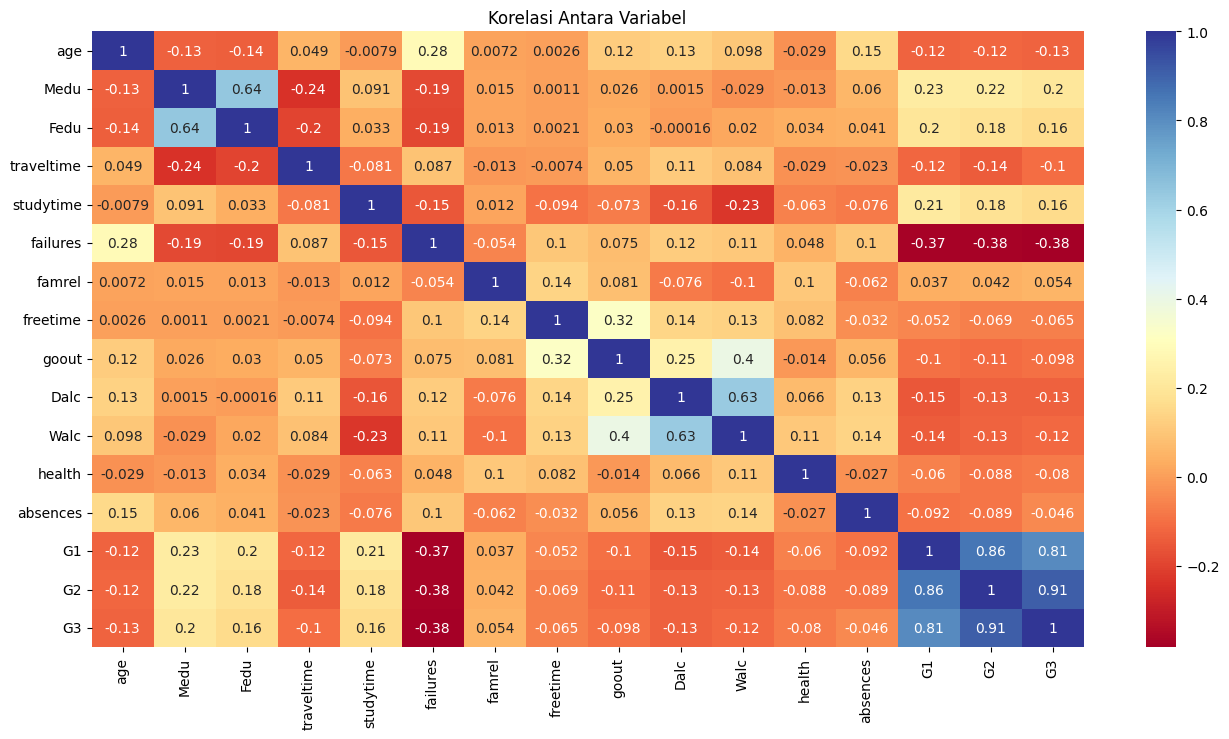

In [4]:
# nah karena string tidak bisa jadi float, maka kolom yang bernilai string di pilih lalu di drop
numeric_data = data_satu.apply(pd.to_numeric, errors='coerce')
tanpa_string = numeric_data.dropna(axis=1, how='all')

correlation_matrix = tanpa_string.corr()
plt.figure(figsize=[16,8])
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Korelasi Antara Variabel')
plt.show()

In [5]:
df = data_satu[['G1', 'G2', 'G3']]
df
print('============ cek data ============')
print(df)
print('============ cek null ============')
print(df.isnull().sum())
print('============ cek tipe ============')
print(df.dtypes)

============ cek data ============
      G1  G2  G3
0      5   6   6
1      5   5   6
2      7   8  10
3     15  14  15
4      6  10  10
...   ..  ..  ..
1039  10  11  10
1040  15  15  16
1041  11  12   9
1042  10  10  10
1043  10  11  11

[1044 rows x 3 columns]
============ cek null ============
G1    0
G2    0
G3    0
dtype: int64
============ cek tipe ============
G1    int64
G2    int64
G3    int64
dtype: object


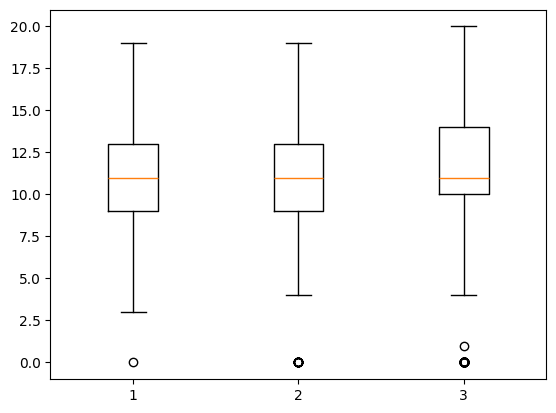

In [6]:
plt.boxplot(df)
plt.show()

<Axes: >

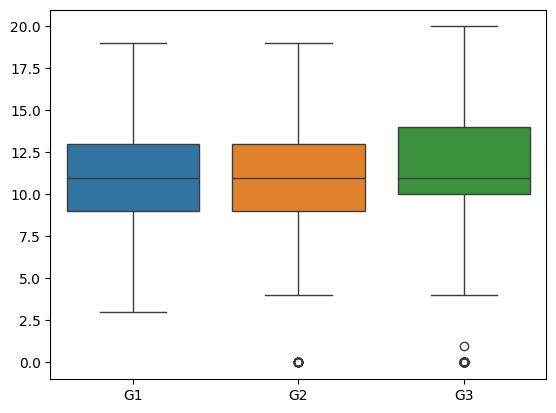

In [7]:
Q1 = df.G1.quantile(0.25)
Q3 = df.G1.quantile(0.75)
IQR = Q3-Q1
IQR
G1 = df[~((df.G1 < (Q1 - 1.5*IQR)))]
sns.boxplot(G1)

<Axes: >

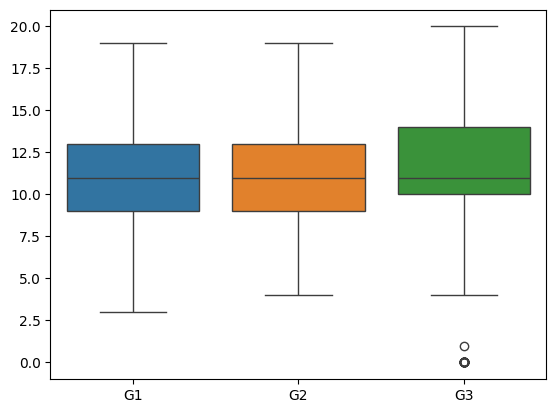

In [8]:
Q1 = G1.G2.quantile(0.25)
Q3 = G1.G2.quantile(0.75)
IQR = Q3-Q1
IQR
G2 = G1[~((G1.G2 < (Q1 - 1.5*IQR)))]
sns.boxplot(G2)

<Axes: >

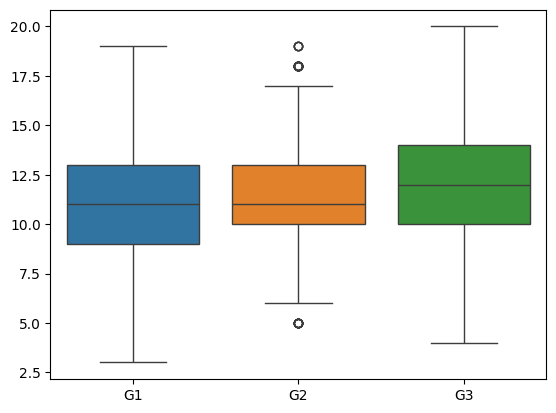

In [9]:
Q1 = G2.G3.quantile(0.25)
Q3 = G2.G3.quantile(0.75)
IQR = Q3-Q1
IQR
G3 = G2[~((G2.G3 < (Q1 - 1.5*IQR)))]
sns.boxplot(G3)

<Axes: >

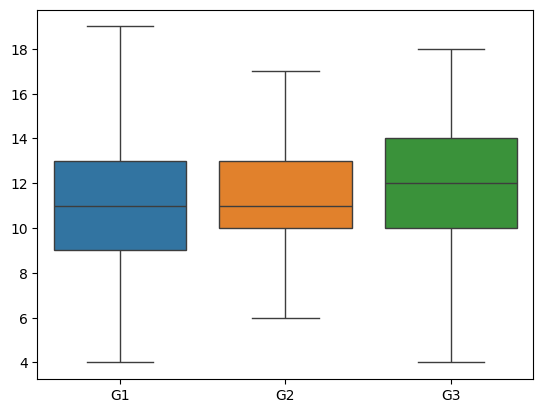

In [10]:
Q1 = G3.G2.quantile(0.25)
Q3 = G3.G2.quantile(0.75)
IQR = Q3-Q1
IQR
clean_data = G3[~((G3.G2 < (Q1 - 1.5*IQR))| (G3.G2 > (Q3 + 1.5*IQR)))]
sns.boxplot(clean_data)

In [11]:
x = clean_data[['G1', 'G2']] 
y = clean_data['G3'].values

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse', mse)
print('r2', r2)

mse 0.7410101391209221
r2 0.8928636679101292


/tmp/ipykernel_16718/470453204.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='red', label='Linear Regression')


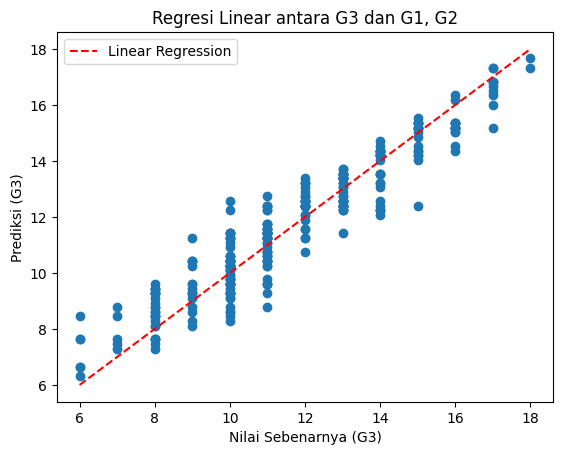

In [12]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='red', label='Linear Regression')
plt.xlabel('Nilai Sebenarnya (G3)')
plt.ylabel('Prediksi (G3)')
plt.title('Regresi Linear antara G3 dan G1, G2')
plt.legend() # menampilkan legenda ke plot
plt.show()

In [13]:
data = clean_data.reset_index(drop=True)
data

,G1,G2,G3
0,5,6,6
1,7,8,10
2,15,14,15
3,6,10,10
4,15,15,15
...,...,...,...
943,10,11,10
944,15,15,16
945,11,12,9
946,10,10,10


In [14]:
model.fit(data[['G1', 'G2']], data.G3)
hasil = model.predict([[10,10]])
print('Maka Hasil prediksi nilai G3 nya :', hasil)

Maka Hasil prediksi nilai G3 nya : [10.38681142]


/home/fork/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


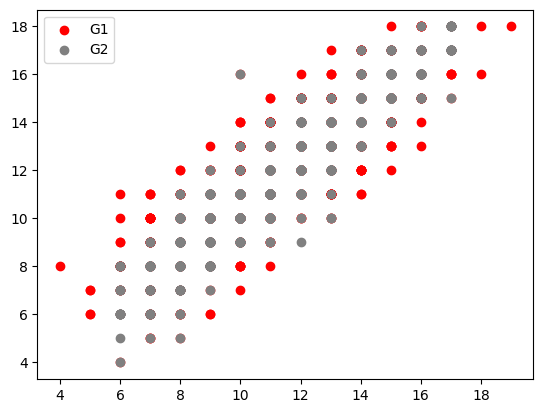

In [15]:
plt.scatter(data.G1, data.G3, color = 'red', label = 'G1')
plt.scatter(data.G2, data.G3, color = 'grey', label = 'G2')
plt.legend()
plt.show()

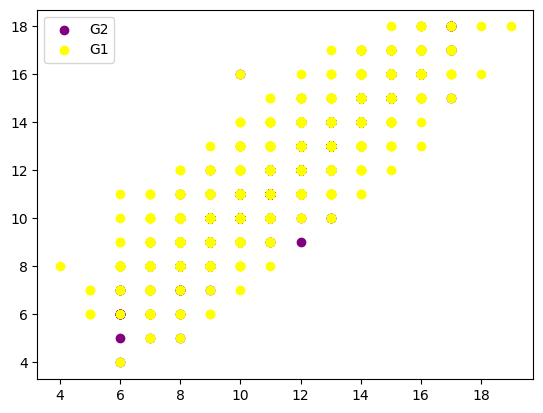

In [16]:
plt.scatter(data.G2, data.G3, color = 'purple', label = 'G2')
plt.scatter(data.G1, data.G3, color = 'yellow', label = 'G1')
plt.legend()
plt.show()

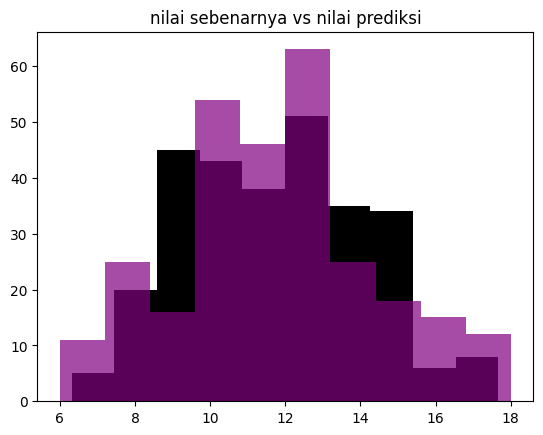

In [18]:
plt.hist(y_pred, color='black')
plt.hist(y_test, color='purple', alpha= 0.7)
plt.title('nilai sebenarnya vs nilai prediksi')
plt.show()